# Lecture 35 - Multi-Layer Perceptron and Backpropagation

# Multi-Layer Perceptron (MLP)

A multilayer perceptron (MLP) is a class of feed-forward artificial neural network (ANN). An MLP consists of at least three layers of nodes. Except for the input nodes, each node is a neuron that uses an activation function (either linear or non-linear). 

Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

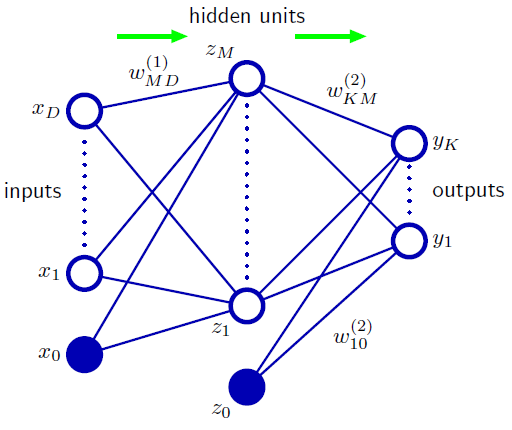

In [1]:
from IPython.display import Image
Image('figures/mlp2.png',width=500)

In MLPs, each neuron's output can be subject to different activation functions. The choice of the activation function is in itself a *free-parameter*.
* Which activation function would you use if you desired labels are $\{1,2,3,4,\dots,8,9\}$? 

* *What each of the layers do?*
    * The first hidden layer draws boundaries
    * The second hidden layer combines the boundaries
    * The third and further layers can generate arbitrarily complex shapes

## Universal Approximation Theorem

"The *Universal Approximation Theorem* states that a feed-forward network with a single hidden layer containing a finite number of neurons can approximate continuous functions on compact subsets of $\mathbb{R}^N$, under mild assumptions on the activation function. The theorem thus states that simple neural networks can represent a wide variety of interesting functions when given appropriate parameters; however, it does not touch upon the algorithmic learnability of those parameters."

Let $\phi(\cdot)$ be a non-constant, bounded and monotonic-increasing continuous function. Let $I_{m_0}$ denote the $m_0$-dimensional unit hypercube $[0, 1]^{m_0}$. The space of continuous functions on $I_{m_0}$ is denoted by $C(I_{m_0})$.  Then, given any function $f \ni C(I_{m_0})$ and $\epsilon > 0$, there exists an integer $m_1$ and sets of real constants $\alpha_i, \beta_i,$ and $w_{ij}$, where $i = 1, \ldots, m_1$ and $j = 1, \ldots, m_0$ such that we may define

\begin{align*}
F(x_1, \ldots, x_{m_0}) = \sum_{i=1}^{m_1} \alpha_i \phi\left( \sum_{j=1}^{m_0} w_{ij}x_j + b_i\right)
\end{align*}

as an approximation realization of the function $f(\cdot)$, that is, 

\begin{align*}
\left| F(x_1, \ldots, x_{m_0}) - f(x_1, \ldots, x_{m_0}) \right| < \epsilon
\end{align*}

for all $x_1, x_2, \ldots, x_{m_0}$ that like in the input space.

Essentially, the Universal Approximation Theorem states that a single hidden layer is sufficient for a multilayer perceptron to compute a uniform $\epsilon$ approximation to a given training set - provided you have the *right* number of neurons and the *right* activation function. 

* However, this does not say that a single hidden layer is optimal with regards to learning time, generalization, etc.)

* In other words, a **feed-forward MLP with one hidden layer can approximate arbitrarily closely any function**.

___

### Exercise

Suppose you had the following neural network:

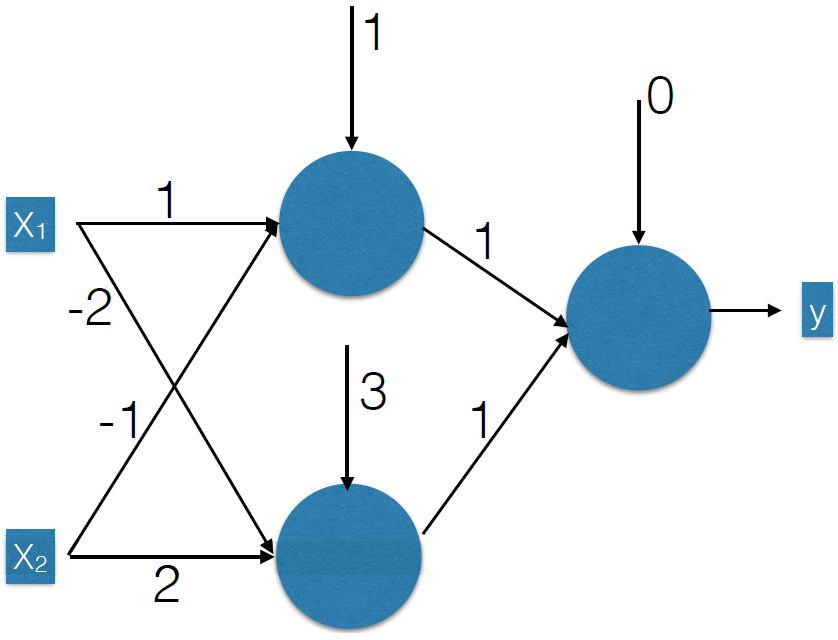

In [2]:
Image('figures/MLP.png',width=400)

with the activation function:

\begin{align*}
\phi(x) = \begin{cases} 1 & x > 0 \\ -1 & x \leq 0 \end{cases}
\end{align*}

1. What is the expression of the output value $y$ in terms of the input values?

2. What is the output with the following input values?
    * $[0,0]$
    * $[-2, -2.5]$
    * $[-5, 5]$
    * $[10, 3]$

3. What does the decision surface of this network look like graphically? Draw it out by hand.

___

# Error Backpropagation

* The learning procedure involves the presentation of a set of pairs of input and output patterns, $X=\{x_i\}_{i=1}^N$ and $Y=\{y_j\}_{j=1}^M$. The system uses the input vector to produce its own output vector and then compares this with the \emph{desire output}, or \emph{target output} $t=\{t_j\}_{j=1}^M$. If there is no difference, no learning takes place. Otherwise, the weights are changed to reduce the difference. This procedure is basically the perceptron learning algorithm.

* This procedure can be *automated* by the machine itself, without any outside help, if we provide some **feedback** to the machine on how it is doing. The feedback comes in the form of the definition of an *error criterion* or *objective function* that must be *minimized* (e.g. Mean Squared Error). For each training pattern we can define an error ($\epsilon_k$) between the desired response ($d_k$) and the actual output ($y_k$). Note that when the error is zero, the machine output is equal to the desired response. This learning mechanism is called **(error) backpropagation** (or **BP**).

* The backpropagation algorithm consists of two phases: 
     * **Forward phase:** computes the *functional signal*, feed-forward propagation of input pattern signals through the network.
    * **Backward phase:** computes the *error signal*, propagates the error backwards through the network starting at the output units (where the error is the difference between desired and predicted output values).

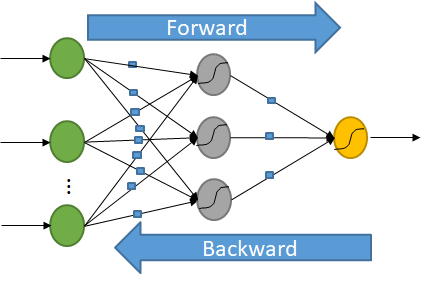

In [3]:
Image('figures/ForwardBackward.png',width=400)

* **Objective function/Error Criterion:** there are many possible definitions of the error, but commonly in neuro-computing one uses the error variance (or power):

\begin{align*}
J(w) = \frac{1}{2}\sum_{k=1}^N \epsilon^2 = \frac{1}{2} \sum_{k=1}^N (d_k-y_k)^2 = \frac{1}{2} \sum_{k=1}^N (d_k-w^Tx_k)^2
\end{align*}

* Now we need to define an **adaptive learning** algorithm. Backpropagation commonly uses the gradient descent as the adaptive learning algorithm.

* **Adaptive Learning Algorithm:** there are many learning algorithms, the most common is the method of Gradient/Steepest Descent.
    * Move in direction opposite to the gradient, $\nabla J(\mathbf{w})$, vector (**gradient descent**):

\begin{align*}
w^{(n+1)} &= w^{(n)} + \Delta w^{(n)}
\end{align*}

This is known as the **error correction rule**. We define: 

\begin{align*}
\Delta w^{(n)} &= w^{(n)} - w^{(n-1)}\\
\Delta w^{(n)} &= - \eta \nabla J(w^{(n)})
\end{align*}

where $\eta$ is the learning rate.

## Backpropagation of the Error for the Output Layer

There are many approaches to train a neural network. One of the most commonly used is the **Error Backpropagation Algorithm**. 

Let's first consider the output layer:
* Given a training set, $\left\{ x_n, d_n\right\}_{n = 1}^N$, we want to find the parameters of our network that minimizes the squared error: 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N (d_l - y_l)^2
\end{align*}

* In order to use gradient descent, we need to compute the analytic form of the gradient, $\frac{\partial J}{\partial w_{lj}}$.

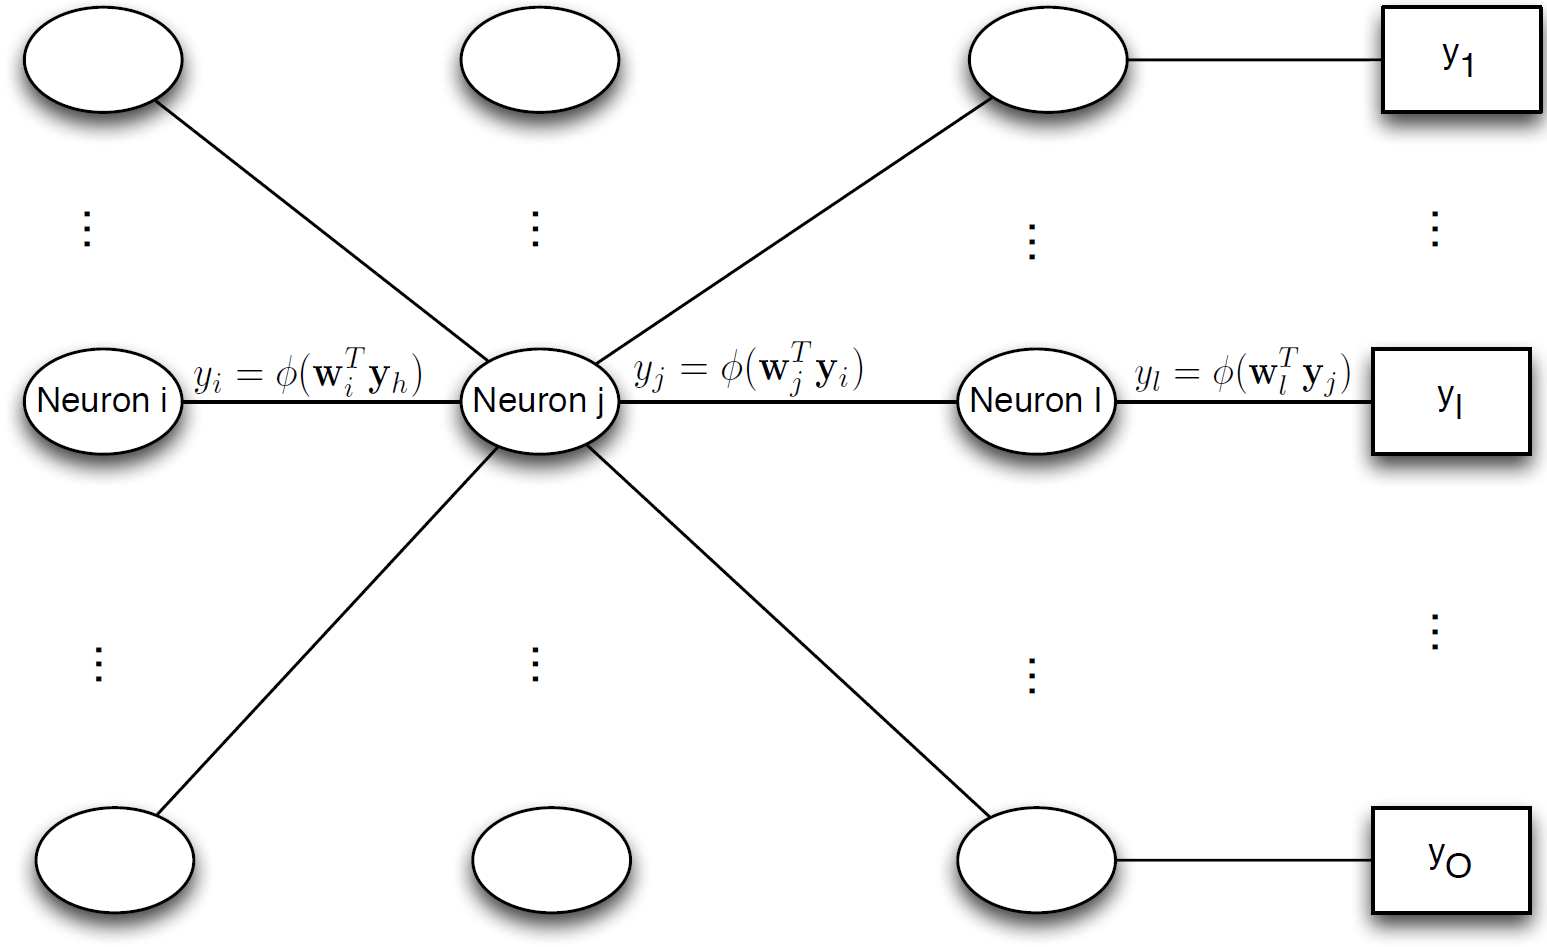

In [4]:
Image('figures/HiddenLayer.png',width=700)

<div class="alert alert-info">
    <b>Chain Rule</b>

Given a labelled training set, $\left\{ x_n, d_n\right\}_{n = 1}^N$, consider the objetive function 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N e_l^2
\end{align*}

where $w$ are the parameters to be estimated and $\forall l$: 

\begin{align*}
e_l &= d_l - y_l \\
y_l &= \phi(v_l)\text{, }\phi(\bullet)\text{ is an activation function}\\
v_l &= w^Tx_j\text{ (note that }x_j\in\mathbb{R}^{D+1}\text{)}  
\end{align*}

Using the Chain Rule, we find:

\begin{align*}
\frac{\partial J}{\partial w_{lj}} = \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial w_{lj}}
\end{align*}

where
\begin{align*}
\frac{\partial J}{\partial e_l} = \frac{1}{2} 2 e_l = e_l = d_l - y_l
\end{align*}

\begin{align*}
\frac{\partial e_l}{\partial y_l} = -1
\end{align*}

\begin{align*}
\frac{\partial y_l}{\partial v_l} = \frac{\partial \phi(v_l)}{\partial v_l} = \phi'(v_l)
\end{align*}

\begin{align*}
\frac{\partial v_l}{\partial w_{lj}} = x_j
\end{align*}

Therefore

\begin{align*}
\frac{\partial J}{\partial w_{lj}} = e_l (-1) \phi'(v_l) x_j
\end{align*}

</div>

* If activation function is the sigmoid, $\phi(x) = \frac{1}{1+e^{-x}}$, then $\phi'(x) = \phi(x)(1-\phi(x))$

* If activation function is the hyperbolic tangent (tanh), $\phi(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$, then $\phi'(x) = 1-\phi(x)^2$

* If activation function is the ReLU, $\phi(x) = \begin{cases}0, & x \leq 0 \\ x, & x>0 \end{cases}$, then $\phi'(x) = \begin{cases}0, & x \leq 0 \\ 1, & x>0 \end{cases}$


Now that we have the gradient, how do we use this to update the output layer weights in our MLP?

\begin{align*}
w_{lj}^{(t+1)} = w_{lj}^{(t)} - \eta \frac{\partial J}{\partial w_{lj}} = w_{lj}^{(t)} + \eta e_i\phi'(v_l) x_j
\end{align*}

* How will this update equation  (for the output layer) change if the network is a multilayer perceptron with hidden units?

* Can you write this in vector form to update all weights simultaneously?

* Next, the hidden layers...

## Backpropagation of the Error for the Hidden Layers

* In a neural network, we can only define an error at the output layer! Therefore, we need to backward propagate the error obtain at the output layer, hence *backpropagation*.

Suppose we want to update $w_{ji}$ where $j$ is the hidden layer. (Let's follow the labeling in the figure below.)

The error objective function overall $N$ data points is 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N e_l^2 = \frac{1}{2} \sum_{l=1}^N \left(d_l - y_l\right)^2 = \frac{1}{2} \sum_{l=1}^N \left(d_l - \phi_l(v_l)\right)^2
\end{align*}

As we have seen earlier,

\begin{align*}
\frac{\partial J}{\partial w_{lj}} &= \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial w_{lj}} \\
&= e_l (-1) \phi'(v_l) y_{jl}
\end{align*}

Let's define the *local gradient* $\delta_l$:

\begin{align*}
\delta_l &= -\frac{\partial J}{\partial v_l} \\
&= e_l \phi'(v_l)
\end{align*}

Similarly,

\begin{align*}
\delta_j &= -\frac{\partial J}{\partial v_j} \\
&= -\frac{\partial J}{\partial y_j} \frac{\partial y_j}{\partial v_j} \\
&= -\frac{\partial J}{\partial y_j} \phi'(v_j)
\end{align*}

Note that,

\begin{align*}
\frac{\partial J}{\partial y_j} &= \sum_l \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial y_j} \\
&= \sum_l e_l (-1) \phi'(v_l) w_{lj} \\
\end{align*}

So,

\begin{align*}
\delta_j &= -\frac{\partial J}{\partial y_j} \phi'(v_j) \\
&= - \left[ \sum_l e_l (-1) \phi'(v_l) w_{lj} \right] \phi'(v_j) \\
&= \phi'(v_j)\sum_l \delta_l w_{lj}
\end{align*}

* We can write the gradient at a hidden neuron in terms of the local gradient and the connect neurons in the next layer:

\begin{align*}
\Delta w_{ij} = \eta \delta_j x_i
\end{align*}

And so,

\begin{align*}
w_{ij}^{t+1} \leftarrow w_{ij}^{t} + \Delta w_{ij}^{t}
\end{align*}

#### Recommended Reading 

["Learning representations by back-propagating errors"](https://www.nature.com/articles/323533a0) by David E. Rumelhart, Geoffrey E. Hinton, and Ronald J. Williams. Nature 323 (6088): 533–536, 8, October 1986.